## Loading modules and checking device
First, we will load our libraries and check which device we are using, we would prefer using cuda for faster training

In [16]:
import os
import re
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import unittest
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tvtf

%matplotlib inline
%load_ext autoreload
%autoreload 2

seed = 318
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
plt.rcParams.update({'font.size': 12})
test = unittest.TestCase()
device

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


device(type='cpu')

## Importing Datasets
Now we will download our different datasets, MNIST, CIFAR-10, CIFAR-100 etc..

MNIST Download

Train: 60000 samples
Test: 60000 samples
MNIST input image size = torch.Size([1, 28, 28])
5


torch.Size([16, 784])

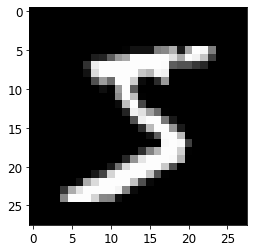

In [26]:
#MNIST DOWNLOAD
data_dir = os.path.expanduser('~/.pytorch-datasets')
mnist_train = torchvision.datasets.MNIST(root=data_dir, download=True, train=True, transform=tvtf.ToTensor())
mnist_test = torchvision.datasets.MNIST(root=data_dir, download=True, train=False, transform=tvtf.ToTensor())
#Create BucketIterator for dataset
batch_size = 16

mdl_train = torch.utils.data.DataLoader(mnist_train, batch_size, shuffle=True)
mdl_test = dl_train = torch.utils.data.DataLoader(mnist_test, batch_size, shuffle=True)


print(f'Train: {len(mnist_train)} samples')
print(f'Test: {len(mnist_train)} samples')

x0,y0 = mnist_train[0]
in_size = x0.shape
num_classes = 10
print('MNIST input image size =', in_size)
print(y0)
def to_image(x):
    return (x * torch.ones(3,28,28)).permute(1,2,0)
plt.imshow(to_image(x0))

X,y = next(iter(mdl_train))
X = X.reshape(X.size(0), -1) 
X.shape

CIFAR-10 Download

## Loading the model
We will now load the Linear Classifier model and test it's output

x-shape:torch.Size([1, 784])


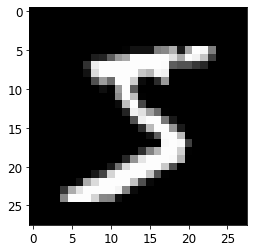

In [18]:
from LinearNetwork import LinearClassifier as FCModel
mnist_model = FCModel(in_size=784, out_classes=10, activation_type="relu", hidden_dims=[392,196,98,48,24])
mnist_model = mnist_model.to(device)

**Performing experiments on the model**

In [27]:
# We will try two main architectures, both with RP layer at first,
# it is a Linear layer which does not train and it's weights are
# a RP matrix from our implemented module for Random Projection
import RandomProjection as RP
from Trainer import train_and_eval
# we will try varying projected dimension k for the MNIST problem
krange = torch.logspace(0,10,10,base=2) #we test k's from 1 to 784 with multiplicative steps of 2
#experiment on different k's


#experiment on different activations and different models (hidden_dims)
lr = 3e-4
optimizer = torch.optim.Adam(mnist_model.parameters(), lr=lr)
loss_fn = nn.NLLLoss()
res = train_and_eval(mnist_model, mdl_train, mdl_test, optimizer, loss_fn)

NameError: name 'mnist_mode' is not defined

Downloading CIFAR-10

In [20]:
#CIFAR-10 DOWNLOAD
data_dir = os.path.expanduser('~/.pytorch-datasets')
cifar10_train = torchvision.datasets.CIFAR10(root=data_dir, download=True, train=True, transform=tvtf.ToTensor())
cifar10_test = torchvision.datasets.CIFAR10(root=data_dir, download=True, train=False, transform=tvtf.ToTensor())

print(f'Train: {len(cifar10_train)} samples')
print(f'Test: {len(cifar10_test)} samples')

x0,_ = cifar10_train[0]
in_size = x0.shape
num_classes = 10
print('CIFAR-10 input image size =', in_size)

Files already downloaded and verified
Files already downloaded and verified
Train: 50000 samples
Test: 10000 samples
CIFAR-10 input image size = torch.Size([3, 32, 32])


## Download datasets (To be added)

<h4>Importing our experiments</h4>
Now, we will load our experiments module for testing the different architectures. 